## This script contains the following:
### Importing libraries and data
### Data cleaning
### Data prep for regression analysis
### Regression analysis


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\charan.lalwani\Documents\cf\Achievement 6\New york citi bikes\Data\Prepared Data\df_new.csv", index_col = False)

### Data cleaning

In [4]:
df.columns

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'age',
       'age_group'],
      dtype='object')

In [5]:
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,age_group
0,LnQzQk,16013,Monday,18,2013-09-09 18:18:00,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:00,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,56.0,56-65
1,IL9boN,15230,Thursday,18,2013-09-12 18:38:00,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:00,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,41.0,36-45
2,46clGB,17942,Wednesday,19,2013-09-18 19:44:00,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:00,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,35.0,36-45
3,v7vdFt,19683,Saturday,11,2013-09-28 11:54:00,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:00,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,36.0,36-45
4,VGBsb5,18024,Saturday,18,2013-09-07 18:08:00,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:00,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1985.0,Not Available,39.0,36-45


In [15]:

# Convert 'start_time' to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])

# Create separate columns for date and time
df['start_date'] = df['start_time'].dt.date
df['start_time_of_day'] = df['start_time'].dt.time

# Display the updated DataFrame
print(df.head())

  trip_id  bike_id    weekday  start_hour          start_time  \
0  LnQzQk    16013     Monday          18 2013-09-09 18:18:00   
1  IL9boN    15230   Thursday          18 2013-09-12 18:38:00   
2  46clGB    17942  Wednesday          19 2013-09-18 19:44:00   
3  v7vdFt    19683   Saturday          11 2013-09-28 11:54:00   
4  VGBsb5    18024   Saturday          18 2013-09-07 18:08:00   

   start_station_id       start_station_name  start_station_latitude  \
0               523          W 38 St & 8 Ave               40.754666   
1               257  Lispenard St & Broadway               40.719392   
2               479          9 Ave & W 45 St               40.760193   
3               527          E 33 St & 1 Ave               40.743156   
4               521          8 Ave & W 31 St               40.750450   

   start_station_longitude             end_time  ...  end_station_latitude  \
0               -73.991382  2013-09-09 18:35:00  ...             40.742388   
1               -74.

### Duplicates

In [7]:
# Check for  duplicates
dups = df.duplicated()

In [8]:
dups.shape # No dups

(49970,)

### Missing values

In [9]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

trip_id                    0
bike_id                    0
weekday                    0
start_hour                 0
start_time                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_time                   0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
age                        0
age_group                  0
dtype: int64

### Extreme values checks

C:\Users\charan.lalwani\AppData\Local\Temp\ipykernel_13236\343278676.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trip_duration'], bins=60) # Shows extreme values


<Axes: xlabel='trip_duration', ylabel='Density'>

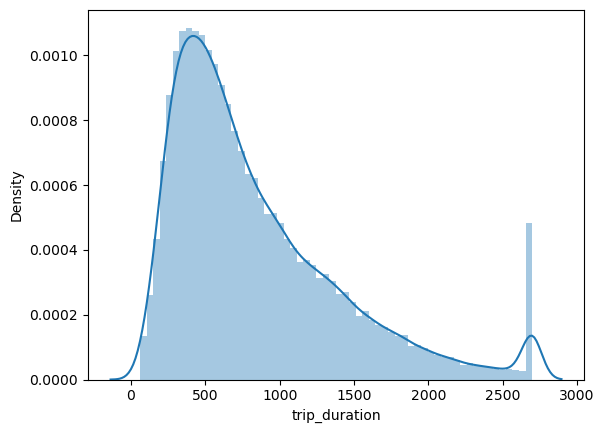

In [10]:
sns.distplot(df['trip_duration'], bins=60) # Shows extreme values

In [11]:
df['trip_duration'].mean() # Check the mean

838.9363017810687

In [13]:
df['trip_duration'].median() # Check the median

672.0

In [14]:
df['trip_duration'].max() # Check the max

2697

### Data prep for regression analysis

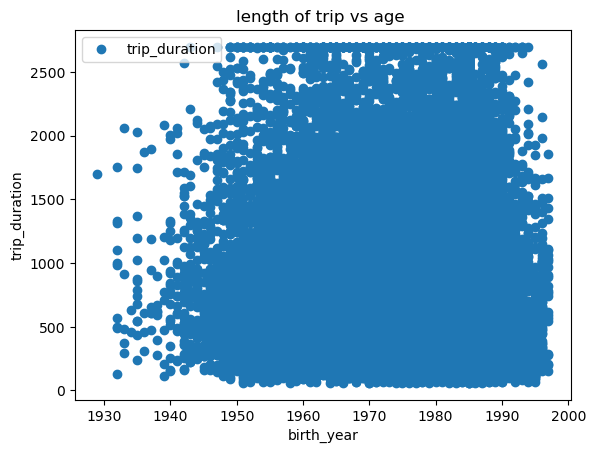

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'birth_year', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('length of trip vs age ')  
plt.xlabel('birth_year')  
plt.ylabel('trip_duration')  
plt.show()

In [32]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['birth_year'].values.reshape(-1,1)
y = df['trip_duration'].values.reshape(-1,1)

In [34]:
X

array([[1968.],
       [1983.],
       [1989.],
       ...,
       [1961.],
       [1985.],
       [1980.]])

In [35]:
y 

array([[ 993],
       [ 581],
       [ 361],
       ...,
       [1050],
       [2697],
       [ 370]], dtype=int64)

In [37]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression analysis

In [36]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [38]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

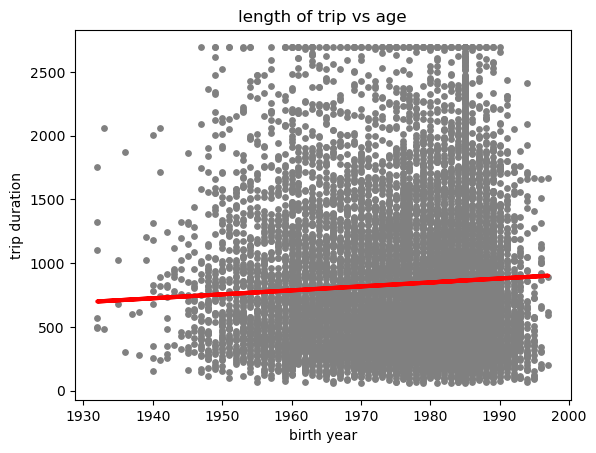

In [41]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('length of trip vs age')
plot_test.xlabel('birth year')
plot_test.ylabel('trip duration')
plot_test.show()

In [42]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [43]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.10928016]]
Mean squared error:  324701.02590693097
R2 score:  0.0013811159835926956


In [44]:
y_predicted

array([[848.5520578 ],
       [864.09845859],
       [851.66133796],
       ...,
       [864.09845859],
       [817.45925621],
       [864.09845859]])

In [45]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1035,848.552058
1,565,864.098459
2,537,851.661338
3,839,836.114937
4,479,857.879898
5,374,879.644859
6,2697,864.098459
7,761,820.568536
8,671,864.098459
9,1208,864.098459


### Compare how the regression fits the training set

In [25]:
rides_per_hour = df.groupby('start_hour')['trip_id'].count()
hours = rides_per_hour.index
average_rides_per_hour = rides_per_hour / len(df['trip_id'].unique())


In [46]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [47]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [48]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.10928016]]
Mean squared error:  329718.1092856588
R2 score:  0.0033060428362731153


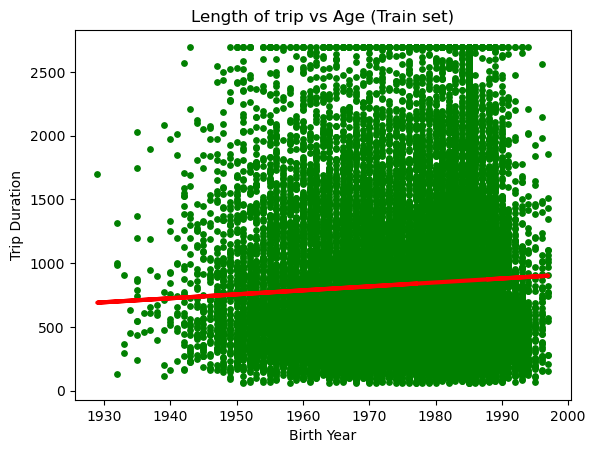

In [49]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Length of trip vs Age (Train set)')
plot_test.xlabel('Birth Year')
plot_test.ylabel('Trip Duration')
plot_test.show()

In [50]:
df.to_csv(os.path.join(r"C:\Users\charan.lalwani\Documents\cf\Achievement 6\New york citi bikes\Data\Prepared Data" ,"df_reg_analysis.csv"), index=False)